In [1]:
import scipy

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# 1.6 Matplotlib
## 1.6.1 単純なグラフの描画

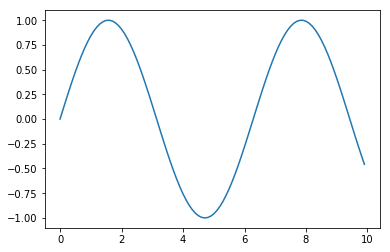

In [4]:
x = np.arange(0,10,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.show()

## 1.6.2 pyplotの機能

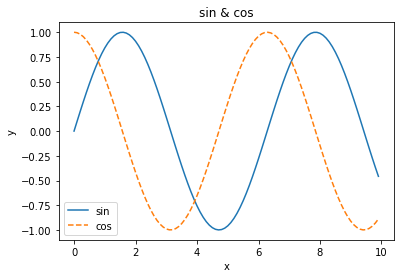

In [5]:
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,label='sin')
plt.plot(x,y2,linestyle = '--', label='cos')
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

## 1.6.2 画像の表示

In [6]:
import sys
import os

In [7]:
os.chdir("./dataset")

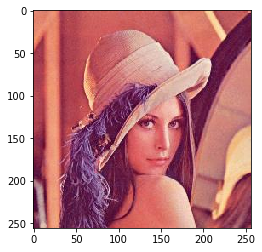

In [8]:
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('lena.png')
plt.imshow(img)

plt.show()

# 2.パーセプトロン
## 2.3 実装
### 2.3.1 簡単な実装

In [9]:
## AND回路
def AND(x1,x2):
    w1, w2, theta = 0.5 , 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <=theta:
        return 0
    elif tmp > theta:
        return 1

In [10]:
AND(0,0) #0

0

In [11]:
AND(1,0) #0

0

In [12]:
AND(0,1) #0

0

In [13]:
AND(1,1) #1

1

### 2.3.2 重みとバイアスの導入

In [14]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
w*x

array([ 0. ,  0.5])

In [15]:
np.sum(w*x)

0.5

In [16]:
np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 重みとバイアスによる実装

In [17]:
def AND(x1,x2):
    x = np.array([[x1,x2]])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0 
    else:
        return 1    

In [18]:
def NAND(x1, x2):
    x = np.array([[x1,x2]])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [19]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

AND, NAND, ORゲートはパーセプトロンで作られるが，XORゲートは作られない．しかし，多層パーセプトロンに拡張すればできる．

### 2.5.2 XORゲートの実装

In [20]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [21]:
XOR(0, 0)

0

In [22]:
XOR(1, 0)

1

In [23]:
XOR(0, 1)

1

In [24]:
XOR(1, 1)

0

# 3.ニューラルネットワーク

## 3.2 活性化関数
### 3.2.2 ステップ関数の実装

In [25]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

↑Numpy配列にに対応した表記（ブーリアン→整数値）にすることでステップ関数を表現

### 3.2.3 ステップ関数のグラフ

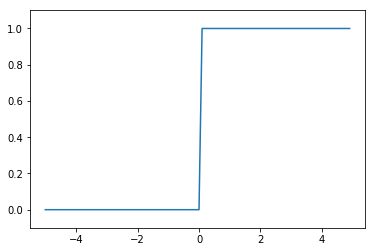

In [26]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 シグモイド関数の実装

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.とすることでNumpy配列をxに代入できるようになる

In [28]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [29]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([ 2.,  3.,  4.])

In [30]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

Numpy配列全体に演算をかけることができる．

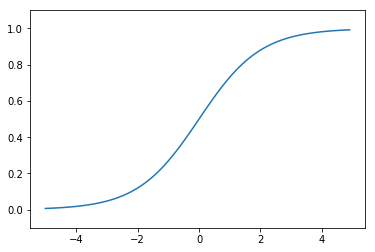

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 シグモイド関数とステップ関数の比較

・「滑らかさ」の違いがニューラルネットワークの学習に役立つ  
・シグモイドは「水車」，ステップ関数は「ししおどし」  
・両者ともに非線形  
→ニューラルネットワークでは活性化関数に非線形関数を用いる必要がある  
→線形関数では，層を厚くする意味がなくなる 

### 3.2.7 ReLU関数

$$  h(x) =\begin{cases}x & x > 0\\0 & x  \leq  0\end{cases} $$

In [32]:
def relu(x):
    return np.maximum(0, x)

後半では主にReLU関数を用いる．

## 3.3 多次元配列の計算

### 3.3.1 多次元配列

In [33]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [34]:
np.ndim(A)

1

In [35]:
A.shape

(4,)

Numpy配列は，タプルで表記されるので，要素が一つの場合には要素のあとにカンマ(,)が必要

In [36]:
A.shape[0]

4

np.arrayのインスタンス変数shapeは，各次元の要素数を表す．

In [37]:
B = np.array([[1, 2], [3, 4], [5, 6]])

In [38]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [39]:
np.ndim(B)

2

In [40]:
B.shape

(3, 2)

### 3.3.2 行列の積

パターン１

In [41]:
A = np.array([[1,2], [3,4]])

In [42]:
A.shape

(2, 2)

In [43]:
B = np.array([[5,6], [7, 8]])

In [44]:
B.shape

(2, 2)

In [45]:
np.dot(A,  B)

array([[19, 22],
       [43, 50]])

パターン２

In [46]:
A = np.array([[1,2,3], [4,5,6]])

In [47]:
A.shape

(2, 3)

In [48]:
B = np.array([[1,2], [3,4], [5,6]])

In [49]:
B.shape

(3, 2)

In [50]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

パターン３（互いの行と積の要素数が噛み合っていないとき）

In [51]:
C = np.array([[1,2], [3,4]])

In [52]:
C.shape

(2, 2)

In [53]:
A.shape

(2, 3)

In [54]:
np.dot(C,A)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [55]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

パターン４

In [56]:
A = np.array([[1,2],[3,4],[5,6]])

In [57]:
A.shape

(3, 2)

In [58]:
B = np.array([7,8])

In [59]:
B.shape

(2,)

In [60]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 ニューラルネットワークの行列の積

In [61]:
X = np.array([1, 2])
X.shape

(2,)

In [62]:
W = np.array([[1, 3, 5], [2, 4, 6]])

In [63]:
print(W)

[[1 3 5]
 [2 4 6]]


In [64]:
W.shape

(2, 3)

In [65]:
Y = np.dot(X, W)

In [66]:
print(Y)

[ 5 11 17]


## 3.4 3層ニューラルネットワークの実装

In [67]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [68]:
A1 = np.dot(X,W1) + B1

In [69]:
Z1 = sigmoid(A1)

In [70]:
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


第二層まで

In [71]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])

In [72]:
B2 = np.array([0.1, 0.2])

In [73]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [74]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

出力層へ

In [75]:
def identity_function(x):
    return x

In [76]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [77]:
A3 = np.dot(Z2, W3) + B3

In [78]:
print(A3)

[ 0.31682708  0.69627909]


In [79]:
%matplotlib inline

In [80]:
Y = identity_function(A3) #恒等関数という

In [81]:
print(Y)

[ 0.31682708  0.69627909]


### 3.4.3 実装のまとめ

In [82]:
def init_network():#初期化を行う
    network = {} #ディクショナリ型
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [83]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y  = identity_function(a3)
    
    return y

In [84]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) 

[ 0.31682708  0.69627909]


## 3.5 出力層の設計

### 3.5.1 恒等関数とソフトマックス関数

・恒等関数：回帰問題の出力層に用いる．  
・ソフトマックス関数：分類問題の出力層に用いる．

In [85]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)

In [86]:
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [87]:
sum_exp_a = np.sum(exp_a)

In [88]:
print(sum_exp_a)

74.1221542102


In [89]:
y = exp_a / sum_exp_a

In [90]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [91]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 オーバーフロー対策

In [92]:
a = np.array([1010, 1000, 990])

In [93]:
np.exp(a) / np.sum(np.exp(a))

C:\Users\H.Takeuchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
C:\Users\H.Takeuchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ nan,  nan,  nan])

In [94]:
c = np.max(a)

In [95]:
a-c

array([  0, -10, -20])

In [96]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

↑分子分母のexp関数内に同定数を入れることで，結果は等しく，かつオーバーフローしないようにできる．

In [97]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 ソフトマックス関数の特徴

In [98]:
a = np.array([0.3, 2.9, 4.0]) #ランダム

In [99]:
y = softmax(a)

In [100]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [101]:
np.sum(y)

1.0

　ソフトマックス関数では出力の総和が１になることを利用して，問題に対して確率的な判断が出来るようになる． 
　学習フェーズではソフトマックス関数を使用する必要が出てくるが，推論フェーズでは出力層の最大クラスを算出する際の大小関係の把握には必要がない（ソフトマックス関数は単調増加関数なので）ため，ソフトマックス関数を利用しないのが一般的である．

### 3.5.4 出力層のニューロンの数

クラス分類を行う問題では，出力層のニューロン数は分類したいクラスの総数と等しくするのが一般的である．

## 3.6 手書き数字認識

### 3.6.1 MNISTデータセット

In [102]:
import sys, os

In [103]:
os.chdir("C:/Users/H.Takeuchi/Documents/jupyter/kasago")
from dataset.mnist import load_mnist

In [104]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [105]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [106]:
from PIL import Image

In [107]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [108]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [109]:
print(img.shape)

(784,)


In [110]:
img = img.reshape(28, 28)
print(img.shape)

(28, 28)


In [111]:
img_show(img)

### 3.6.2 ニューラルネットワークの推論処理

In [112]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [113]:
def init_network():
    import pickle
    os.chdir('C:/Users/H.Takeuchi/Documents/jupyter/kasago/ch03')
    with open("sample_weight.pkl", 'rb') as f:
        network =pickle.load(f)
    os.chdir('../') #一つ上の階層
    return network

In [114]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [115]:
x,t = get_data()
network = init_network()

In [116]:
os.getcwd()

'C:\\Users\\H.Takeuchi\\Documents\\jupyter\\kasago'

In [117]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Acurracy:" + str(float(accuracy_cnt) / len(x)))

Acurracy:0.9352


### 3.6.3 バッチ処理

In [118]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape

(10000, 784)

In [119]:
x[0].shape

(784,)

In [120]:
W1.shape

(784, 50)

In [121]:
W2.shape

(50, 100)

In [122]:
W3.shape

(100, 10)

画像をまとめて処理する（バッチ処理）ことで細かく計算をするよりも高速で計算が終わる．

In [123]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x),  batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [124]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [125]:
list(range(0, 10, 3))

[0, 3, 6, 9]

# 4.ニューラルネットワークの学習

## 4.1 データから学習する

### 4.1.1 データ駆動

機械学習：人の考えた特徴量を用いて学習を行うこと.  

ニューラルネットワーク：特徴量までも機械側で選定する学習のこと．

### 4.1.2 訓練データとテストデータ

汎化能力：訓練データに含まれないデータが識別できるかどうかの能力．汎化能力を持たせるために，テストデータと訓練データは分けて用いることが一般的である．

## 4.2 損失関数

### 4.2.1 2乗和誤差

In [126]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

### 4.2.2 交差エントロピー誤差

In [127]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

### 4.2.3 ミニバッチ学習

全データの損失関数を算出するのは計算負荷が大きいので，一部のデータを用いて全データの損失関数として近似する学習方法．

In [128]:
from dataset.mnist import load_mnist

In [129]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)

(60000, 784)


In [130]:
print(t_train.shape)

(60000, 10)


この60000枚の画像データからランダムで10枚だけ選び出す．

In [131]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.3.3 偏微分

In [132]:
%matplotlib inline

In [133]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [134]:
#3Dグラフを描画

In [135]:
from mpl_toolkits.mplot3d import Axes3D

In [136]:
x = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
z = x[0]**2 + x[1]**2

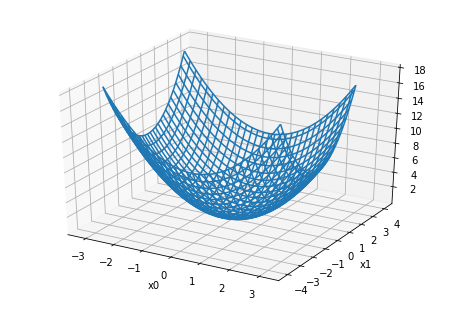

In [137]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x[0], x[1], z)
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()
plt.savefig('multivariate_func.png')

In [138]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grad

In [139]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)
            
        return grad
    
    

In [140]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [141]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

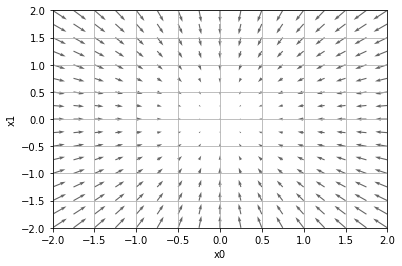

In [142]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]))
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()
    plt.savefig('vector_gradient.png')

In [143]:
print(X)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1